In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from numpy.random import rand

#sklearn imports for metrics
from sklearn import preprocessing
from sklearn.metrics import auc, precision_recall_curve, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#Matplotlib imports for graphs
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
import keras

# Models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

# Layers
from keras.layers import Dense, Activation, Flatten, Dropout, GlobalMaxPooling2D,BatchNormalization
from keras import backend as K

# Other
from keras import optimizers
from keras import losses
from keras.optimizers import SGD, Adam, Adagrad
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.models import load_model

Using TensorFlow backend.


In [4]:
train_data_dir = 'C:\\Users\\Chanchal Sen\\Desktop\\Final_Dataset\\Train'
validation_data_dir = 'C:\\Users\\Chanchal Sen\\Desktop\\Final_Dataset\\Validation'
test_data_dir = 'C:\\Users\\Chanchal Sen\\Desktop\\Final_Dataset\\Test'
nb_train_samples = 1329
nb_validation_samples = 167
epochs = 30
batch_size = 16
img_width, img_height = 224, 224

In [6]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
x = base_model.output
x = GlobalMaxPooling2D()(x)
#x = Dense(256, activation = "relu")(x)
#x = Dropout(0.5)(x)
output = Dense(1, activation = "sigmoid")(x)
new_model = Model(inputs = base_model.input, outputs = output)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
new_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale =1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary')

Found 1328 images belonging to 2 classes.
Found 167 images belonging to 2 classes.


In [12]:
from keras.callbacks import TensorBoard, ReduceLROnPlateau
import time

# checkpoint 

filepath = 'C:\\Users\\Chanchal Sen\\Desktop\\checkpt\\checkpt_best_VGG16-{epoch:02d}-{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto', period = 5)

# earlystopping

#cb_early = EarlyStopping(monitor = 'val_loss', mode='auto', verbose = 1, patience = 4, min_delta = 0.0001,
                         #restore_best_weights = True)

# log
tb = TensorBoard(log_dir='logs/{}'.format(time.time()))

# 
#lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4,
                      # min_lr=0.00001, verbose=1)

In [13]:
history = new_model.fit_generator(train_generator,
                                 steps_per_epoch = nb_train_samples//16,
                                 validation_data = validation_generator,
                                 validation_steps = nb_validation_samples//16,
                                 epochs = epochs,
                                 verbose = 1, 
                                 callbacks = [checkpoint, tb] #lr] 
                                 )

new_model.save('C:\\Users\\Chanchal Sen\\Desktop\\debvgg16.h5')
new_model.save_weights('C:\\Users\\Chanchal Sen\\Desktop\\debvgg16_weights.h5')

end = time.time()
print("Model took %0.2fs to train." % (end-start))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
83/83 [==============================] - 800s 10s/step - loss: 0.4592 - acc: 0.8599 - val_loss: 0.3203 - val_acc: 0.9000
Epoch 2/30
83/83 [==============================] - 814s 10s/step - loss: 0.2745 - acc: 0.9458 - val_loss: 0.2195 - val_acc: 0.9404
Epoch 3/30
83/83 [==============================] - 831s 10s/step - loss: 0.2065 - acc: 0.9548 - val_loss: 0.1834 - val_acc: 0.9338
Epoch 4/30
83/83 [==============================] - 823s 10s/step - loss: 0.1725 - acc: 0.9639 - val_loss: 0.1529 - val_acc: 0.9735
Epoch 5/30
83/83 [==============================] - 766s 9s/step - loss: 0.1557 - acc: 0.9556 - val_loss: 0.1326 - val_acc: 0.9470

Epoch 00005: val_loss improved from inf to 0.13263, saving model to C:\Users\Chanchal Sen\Desktop\checkpt\checkpt_best_VGG16-05-0.95.hdf5
Epoch 6/30
83/83 [==============================] - 842s 10s/step - loss: 0.1307 - acc: 0.9699 - val_loss: 0.1071 - val_acc: 0.9735
Epoch 7/30
83/83 [====

NameError: name 'start' is not defined

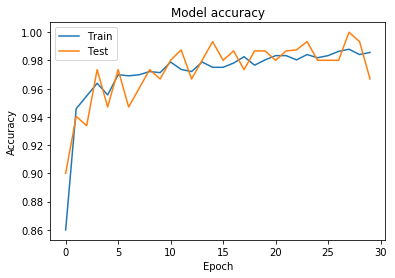

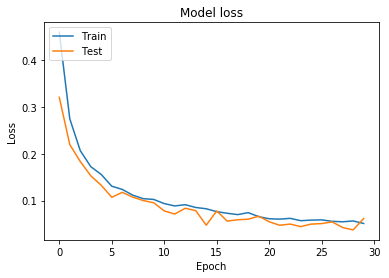

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
test_data_dir = 'C:\\Users\\Chanchal Sen\\Desktop\\Final_Dataset\\Test'

#test_generator = test_datagen.flow_from_directory(
#    test_data_dir,
#    target_size = (img_height, img_width),
#    batch_size = batch_size)
import os
import random
from keras.preprocessing import image

def visualize_predictions(classifier, n_cases):
    
    for i in range(0,n_cases):
        path = random.choice([test_data_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        prediction = new_model.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()
        print(prediction)
        # Write prediction
        if prediction < 0.5:
            print('Padddy')
        else:
            print('Soil')

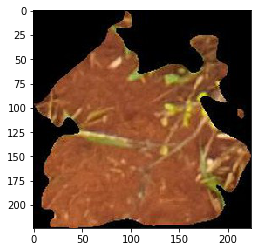

[[0.99986553]]
Soil


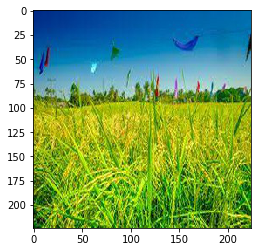

[[0.05538098]]
Padddy


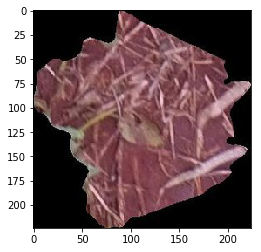

[[0.99939525]]
Soil


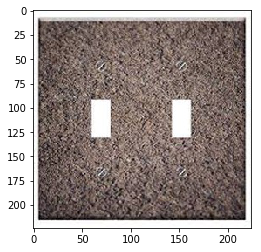

[[0.9775587]]
Soil


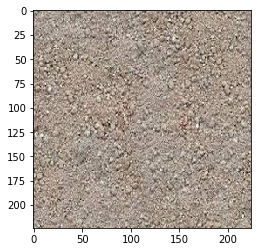

[[0.99691147]]
Soil


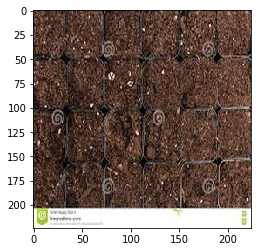

[[0.944037]]
Soil


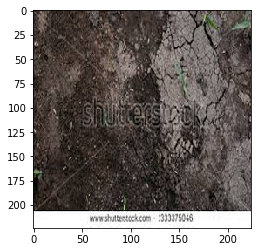

[[0.99686486]]
Soil


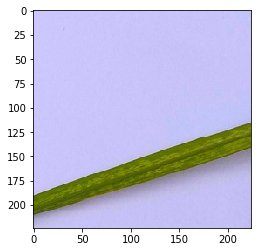

[[0.00305528]]
Padddy


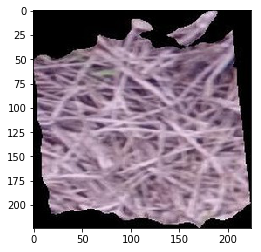

[[0.99860954]]
Soil


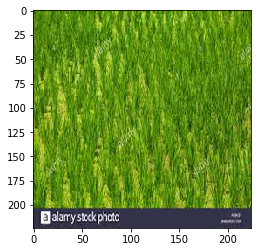

[[0.04880138]]
Padddy


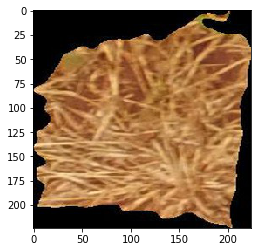

[[0.9996164]]
Soil


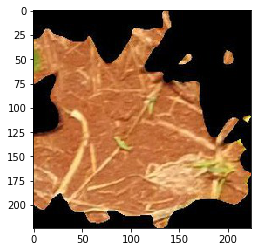

[[0.9998851]]
Soil


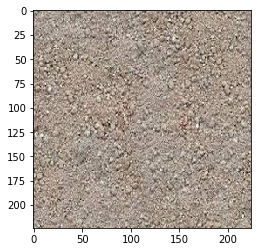

[[0.99691147]]
Soil


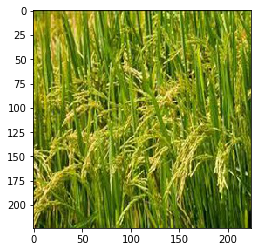

[[0.00068926]]
Padddy


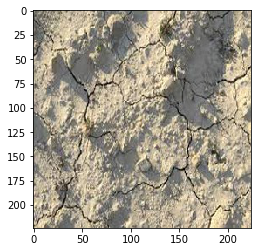

[[0.9999156]]
Soil


In [32]:
visualize_predictions(new_model, 15)